**Stiffness of SLM vs Fixed-Fixed Beam**

Valid!
3210 3210


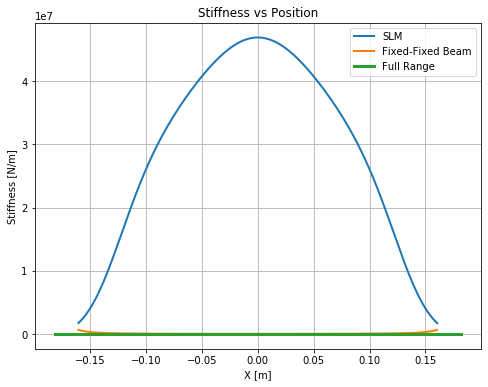

In [15]:
from src.Slm import slm
import numpy as np
import matplotlib.pyplot as plt

# Shared Parameters
E = 200e9 
D = 5

### Stiffness of SLM
A = np.array([.1,.1])
B = np.array([.1,.1,.1,.1])
C = np.array([.275,.275])
SLM = slm.mechanism(A,B,C)
# Loading parmaters
F = [0,-1,0,0,0,0,0,0]
N = SLM.calculate_state(SLM.theta)
thetas = SLM.find_link_angles(N)
SLM.path_stiffness(F,thetas,E,D)
X_SLM = SLM.k_path_x
K_SLM = SLM.ky_array

### Stiffness of Fixed-Fixed Beam (https://mechanicalc.com/reference/beam-deflection-tables)]
D = 5
L_MAX = SLM.MAX_L
L_LIMIT = SLM.LIMIT_L
dL = (L_MAX-L_LIMIT)/2
I = (np.pi/64)*(D/1000)**4
STEP = 0.0001
X_BEAM = np.arange(dL,L_MAX/2,STEP)
K_BEAM = np.array([])
for x in X_BEAM:
    K_BEAM=np.append(K_BEAM,(48*E*I)/((x**2)*((3*L_MAX)-(4*x))))
K_BEAM = np.append(K_BEAM,np.flip(K_BEAM))
X_BEAM = np.append(X_BEAM,np.arange(L_MAX/2,L_MAX-dL,STEP))-L_MAX/2
print(len(K_BEAM),len(X_BEAM))

#### Plotting Results
fig = plt.figure(1)
plt.plot(X_SLM,K_SLM,linewidth=2)
plt.plot(X_BEAM,K_BEAM,linewidth=2)
plt.plot([-L_MAX/2,L_MAX/2],[0,0],linewidth=3)
plt.title("Stiffness vs Position")
plt.xlabel("X [m]")
plt.ylabel("Stiffness [N/m]")
plt.legend(["SLM","Fixed-Fixed Beam","Full Range"],loc="upper right")
fig.set_size_inches(8, 6)
plt.grid()
plt.show()

**Addjusting for Weight**

Valid!
SLM Volume: 9.032078879070654e-05
SLM Diameter:  10
Beam Volume: 9.032078879070657e-05
Beam Diameter: 17.79674048126284


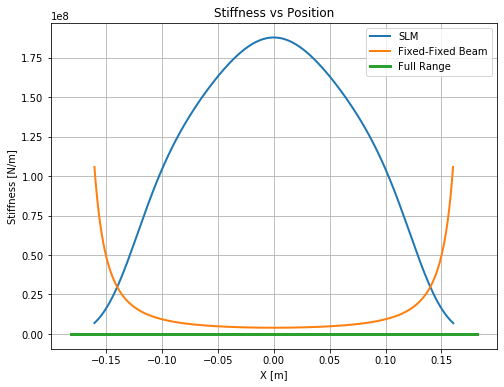

In [19]:
from src.Slm import slm
import numpy as np
import matplotlib.pyplot as plt

# Shared Parameters
E = 200e9 
D = 10

### Stiffness of SLM
A = np.array([.1,.1])
B = np.array([.1,.1,.1,.1])
C = np.array([.275,.275])
SLM = slm.mechanism(A,B,C)
# Loading parmaters
F = [0,-1,0,0,0,0,0,0]
N = SLM.calculate_state(SLM.theta)
thetas = SLM.find_link_angles(N)
SLM.path_stiffness(F,thetas,E,D)
X_SLM = SLM.k_path_x
K_SLM = SLM.ky_array
SLM_LENGTH = np.sum(np.concatenate((A,B,C)))
SLM_AREA = (np.pi/4)*(D/1000)**2
SLM_VOLUME = SLM_LENGTH*SLM_AREA
print("SLM Volume:",SLM_VOLUME)
print("SLM Diameter: ",D)

### Stiffness of Fixed-Fixed Beam (https://mechanicalc.com/reference/beam-deflection-tables)]
L_MAX = SLM.MAX_L
L_LIMIT = SLM.LIMIT_L
D = 1000*(SLM_VOLUME/(L_MAX*np.pi/4))**0.5
print("Beam Volume:",(np.pi/4)*((D/1000)**2)*L_MAX)
print("Beam Diameter:",D)
dL = (L_MAX-L_LIMIT)/2
I = (np.pi/64)*(D/1000)**4
STEP = 0.0001
X_BEAM = np.arange(dL,L_MAX/2,STEP)
K_BEAM = np.array([])
for x in X_BEAM:
    K_BEAM=np.append(K_BEAM,(48*E*I)/((x**2)*((3*L_MAX)-(4*x))))
K_BEAM = np.append(K_BEAM,np.flip(K_BEAM))
X_BEAM = np.append(X_BEAM,np.arange(L_MAX/2,L_MAX-dL,STEP))-L_MAX/2

#### Plotting Results
fig = plt.figure(1)
plt.plot(X_SLM,K_SLM,linewidth=2)
plt.plot(X_BEAM,K_BEAM,linewidth=2)
plt.plot([-L_MAX/2,L_MAX/2],[0,0],linewidth=3)
plt.title("Stiffness vs Position")
plt.xlabel("X [m]")
plt.ylabel("Stiffness [N/m]")
plt.legend(["SLM","Fixed-Fixed Beam","Full Range"],loc="upper right")
fig.set_size_inches(8, 6)
plt.grid()
plt.show()

**Comparing Across Scale**

Valid!
SLM Volume: 0.00018064157758141308
SLM Diameter:  10
Beam Volume: 0.00018064157758141314
Beam Diameter: 17.79674048126284
Range: 0.7261843766475566


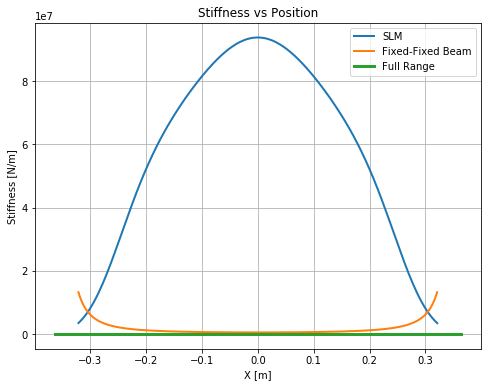

In [20]:
from src.Slm import slm
import numpy as np
import matplotlib.pyplot as plt

# Shared Parameters
E = 200e9 
D = 10

### Stiffness of SLM
SCALE = 2
A = np.array([.1,.1])* SCALE
B = np.array([.1,.1,.1,.1])*SCALE
C = np.array([.275,.275])*SCALE
SLM = slm.mechanism(A,B,C)
# Loading parmaters
F = [0,-1,0,0,0,0,0,0]
N = SLM.calculate_state(SLM.theta)
thetas = SLM.find_link_angles(N)
SLM.path_stiffness(F,thetas,E,D)
X_SLM = SLM.k_path_x
K_SLM = SLM.ky_array
SLM_LENGTH = np.sum(np.concatenate((A,B,C)))
SLM_AREA = (np.pi/4)*(D/1000)**2
SLM_VOLUME = SLM_LENGTH*SLM_AREA
print("SLM Volume:",SLM_VOLUME)
print("SLM Diameter: ",D)

### Stiffness of Fixed-Fixed Beam (https://mechanicalc.com/reference/beam-deflection-tables)]
L_MAX = SLM.MAX_L
L_LIMIT = SLM.LIMIT_L
D = 1000*(SLM_VOLUME/(L_MAX*np.pi/4))**0.5
print("Beam Volume:",(np.pi/4)*((D/1000)**2)*L_MAX)
print("Beam Diameter:",D)
print("Range:",L_MAX)
dL = (L_MAX-L_LIMIT)/2
I = (np.pi/64)*(D/1000)**4
STEP = 0.0001
X_BEAM = np.arange(dL,L_MAX/2,STEP)
K_BEAM = np.array([])
for x in X_BEAM:
    K_BEAM=np.append(K_BEAM,(48*E*I)/((x**2)*((3*L_MAX)-(4*x))))
K_BEAM = np.append(K_BEAM,np.flip(K_BEAM))
X_BEAM = np.append(X_BEAM,np.arange(L_MAX/2,L_MAX-dL,STEP))-L_MAX/2

#### Plotting Results
fig = plt.figure(1)
plt.plot(X_SLM,K_SLM,linewidth=2)
plt.plot(X_BEAM,K_BEAM,linewidth=2)
plt.plot([-L_MAX/2,L_MAX/2],[0,0],linewidth=3)
plt.title("Stiffness vs Position")
plt.xlabel("X [m]")
plt.ylabel("Stiffness [N/m]")
plt.legend(["SLM","Fixed-Fixed Beam","Full Range"],loc="upper right")
fig.set_size_inches(8, 6)
plt.grid()
plt.show()